In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/301_project



/content/drive/.shortcut-targets-by-id/1MYdHZqeVKSuQzIzZWrfBqMgi2EgY91a0/301_project


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("imdb.csv", usecols=["review", "sentiment"], encoding='latin-1')
## 1 - positive, 0 - negative
df.sentiment = (df.sentiment == "positive").astype("int")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:

val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)


def train_val_test_split(df=None, train_percent=0.7, test_percent=0.15, val_percent=0.15):
  df = df.sample(frac=1)
  train_df = df[: int(len(df)*train_percent)]
  test_df = df[int(len(df)*train_percent)+1 : int(len(df)*(train_percent+test_percent))]
  val_df = df[int(len(df)*(train_percent + test_percent))+1 : ]
  return train_df, test_df, val_df

train_df, test_df, val_df = train_val_test_split(df, 0.7, 0.15, 0.15)
train_labels, train_texts = train_df.values[:,1], train_df.values[:,0]
val_labels, val_texts = val_df.values[:,1], val_df.values[:,0]
test_labels, test_texts = test_df.values[:,1], test_df.values[:,0]
print(len(train_df), len(test_df), len(val_df))
print(len(train_texts), len(train_labels), len(val_df))

35000 7499 7499
35000 35000 7499


In [ ]:
train_texts[0]

"This movie brilliantly captures the atmosphere of a D&D group. While watching, I could not help but notice how vividly characters reminded me of myself and my gaming friends to the point where they acted literally the same as we do. Including the bickering, the fighting, the internal jokes, driving the DM crazy. EVERYTHING.<br /><br />It has it all. Jokes that made me cry, action scenes which, even filmed in low-budget, I found uncannily awesome. The story is pretty straightforward and unsurprising, but that doesn't really matter, since the best part of the movie is to see the characters react and interact with each other and the NPCs.<br /><br />Seriously, if you're playing D&D or any similar RPG, I cannot stress this enough, WATCH THIS MOVIE, it captured beautifully the spirit of D&D."

# cleaning

In [ ]:
from string import punctuation
from os import listdir
from nltk.corpus import stopwords
from pickle import dump

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# turn a doc into clean tokens
def clean_doc(data):
  preprocessed_data = []
  for doc in data:
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    tokens = ' '.join(tokens)

    preprocessed_data.append(tokens)

  return preprocessed_data

In [ ]:
trainX = clean_doc(train_texts)
valX = clean_doc(val_texts)
testX=clean_doc(test_texts)

# bag of words


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])
 
# encode a list of lines
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded

In [ ]:
# create tokenizer
tokenizer = create_tokenizer(trainX)
# calculate max document length
length = max_length(trainX)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)

# encode data
trainX = encode_text(tokenizer, trainX, length)
valX = encode_text(tokenizer, valX, length)
testX = encode_text(tokenizer, testX, length)
print(trainX.shape)

Max document length: 1480
Vocabulary size: 143416
(35000, 1480)


## use word2vec as embedding layer

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors


EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)


In [ ]:


vocabulary_size

20000

In [ ]:
#don't run
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        print(f'word {word} not in w2v')
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

word and not in w2v
word a not in w2v
word of not in w2v
word to not in w2v
word /><br not in w2v
word   not in w2v
word />the not in w2v
word <br not in w2v
word i'm not in w2v
word />i not in w2v
word i've not in w2v
word "the not in w2v
word />this not in w2v
word 10 not in w2v
word â not in w2v
word i'd not in w2v
word />in not in w2v
word />it not in w2v
word film's not in w2v
word />if not in w2v
word it<br not in w2v
word />but not in w2v
word />there not in w2v
word i'll not in w2v
word movie<br not in w2v
word film<br not in w2v
word />and not in w2v
word ! not in w2v
word />a not in w2v
word />as not in w2v
word />it's not in w2v
word 20 not in w2v
word 'the not in w2v
word />so not in w2v
word />what not in w2v
word it! not in w2v
word "i not in w2v
word   not in w2v
word humour not in w2v
word 80's not in w2v
word 15 not in w2v
word 30 not in w2v
word />all not in w2v
word />my not in w2v
word movie's not in w2v
word />one not in w2v
word " not in w2v
word ? not in w2v
wo

In [ ]:
#dump to pkl
with open('em_w2v_train.pkl', 'wb') as handle:
    pkl.dump(embedding_matrix, handle)

In [ ]:
# load if saevd
with open('em_w2v_train.pkl', 'rb') as handle:
    embedding_matrix=pkl.load(handle)

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=False)  #-------unsure

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       [-0.91204109,  0.88575532,  0.0025902 , ..., -0.50070606,
        -0.4411896 , -0.5499527 ],
       ...,
       [ 0.08837891,  0.10644531,  0.09912109, ..., -0.15820312,
        -0.04760742, -0.07226562],
       [ 0.01281738,  0.0078125 , -0.02758789, ..., -0.11328125,
         0.05151367,  0.15820312],
       [ 0.01275635, -0.12988281, -0.10058594, ..., -0.01928711,
        -0.18261719,  0.12695312]])

In [ ]:
embedding_matrix.shape

(20000, 300)

# define model

In [ ]:

from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras import regularizers

In [ ]:
# define the model
def define_model(length, vocab_size):
	# channel 1
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 100)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	outputs = Dense(1, activation='sigmoid')(flat1)
 
	model = Model(inputs=inputs1, outputs=outputs)
 
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	plot_model(model, show_shapes=True, to_file='multichannel.png')
	return model

In [ ]:
# define model
model = define_model(length, vocab_size)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1480)]            0         
                                                                 
 embedding_5 (Embedding)     (None, 1480, 100)         14341600  
                                                                 
 conv1d_5 (Conv1D)           (None, 1477, 32)          12832     
                                                                 
 dropout_5 (Dropout)         (None, 1477, 32)          0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 738, 32)          0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 23616)             0         
                                                           

In [ ]:
import tensorflow as tf

In [ ]:
# callback
# Custom Class to print specified parameters during training
class PrintingCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs=None):
        # print(logs.keys())
        print(
            "The average loss for epoch {} is {:7.2f} "
            "and accuracy is {:7.2f}.".format(
                epoch, logs["val_loss"], logs["val_accuracy"]
            ))
        lr = tf.keras.backend.get_value(self.model.optimizer.learning_rate)
        print("LR is:", lr)
    

# defining a function to checkpoint the model 

checkpoint_filepath = './channel_1/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose = True)



In [ ]:
from datetime import datetime

## 1st 10 epochs

In [ ]:
start = datetime.now()

history = model.fit(trainX, array(train_labels.tolist()),
          batch_size=128,
          validation_data=(valX, array(val_labels.tolist())),
          epochs=10,
          callbacks=[PrintingCallback(), model_checkpoint_callback])

end = datetime.now()

print('time: ',end-start)

print(history.history.keys())

Epoch 1/10
273/274 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.7717The average loss for epoch 0 is    0.29 and accuracy is    0.89.
LR is: 0.001

Epoch 1: val_accuracy improved from -inf to 0.88985, saving model to ./channel_1/checkpoint
274/274 [==============================] - 16s 55ms/step - loss: 0.4344 - accuracy: 0.7720 - val_loss: 0.2869 - val_accuracy: 0.8899
Epoch 2/10
273/274 [============================>.] - ETA: 0s - loss: 0.1522 - accuracy: 0.9447The average loss for epoch 1 is    0.27 and accuracy is    0.89.
LR is: 0.001

Epoch 2: val_accuracy did not improve from 0.88985
274/274 [==============================] - 14s 50ms/step - loss: 0.1522 - accuracy: 0.9447 - val_loss: 0.2690 - val_accuracy: 0.8899
Epoch 3/10
273/274 [============================>.] - ETA: 0s - loss: 0.0536 - accuracy: 0.9830The average loss for epoch 2 is    0.32 and accuracy is    0.88.
LR is: 0.001

Epoch 3: val_accuracy did not improve from 0.88985
274/274 [=========

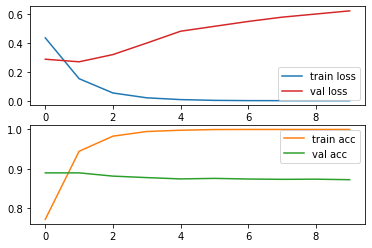

In [ ]:
import matplotlib.pyplot as plt
num_epoch=10
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(num_epoch), history.history['loss'], 'tab:blue', label="train loss")
ax1.plot(range(num_epoch), history.history['val_loss'], 'tab:red', label="val loss")

ax2.plot(range(num_epoch), history.history['accuracy'], 'tab:orange', label="train acc")
ax2.plot(range(num_epoch), history.history['val_accuracy'], 'tab:green', label="val acc")

ax1.legend()
ax2.legend()

In [ ]:
# evaluate model on test dataset dataset
loss, acc = model.evaluate(testX,array(test_labels.tolist()), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 88.025069


In [ ]:
# evaluate model on test dataset dataset from best check point
model.load_weights(checkpoint_filepath)

loss, acc = model.evaluate(testX,array(test_labels.tolist()), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.385253


# 20 mroe epochs

In [ ]:
model.load_weights(checkpoint_filepath)

optim = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])

start = datetime.now()

history_2 = model.fit(trainX, array(train_labels.tolist()),
          batch_size=128,
          validation_data=(valX, array(val_labels.tolist())),
          epochs=10,
          callbacks=[PrintingCallback(), model_checkpoint_callback])

end = datetime.now()

print('time: ',end-start)



Epoch 1/10
273/274 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9435The average loss for epoch 0 is    0.26 and accuracy is    0.89.
LR is: 0.001

Epoch 1: val_accuracy improved from 0.88985 to 0.89332, saving model to ./channel_1/checkpoint
274/274 [==============================] - 16s 54ms/step - loss: 0.1568 - accuracy: 0.9435 - val_loss: 0.2650 - val_accuracy: 0.8933
Epoch 2/10
273/274 [============================>.] - ETA: 0s - loss: 0.0622 - accuracy: 0.9791The average loss for epoch 1 is    0.34 and accuracy is    0.87.
LR is: 0.001

Epoch 2: val_accuracy did not improve from 0.89332
274/274 [==============================] - 14s 51ms/step - loss: 0.0623 - accuracy: 0.9791 - val_loss: 0.3441 - val_accuracy: 0.8728
Epoch 3/10
274/274 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9935The average loss for epoch 2 is    0.39 and accuracy is    0.88.
LR is: 0.001

Epoch 3: val_accuracy did not improve from 0.89332
274/274 [======

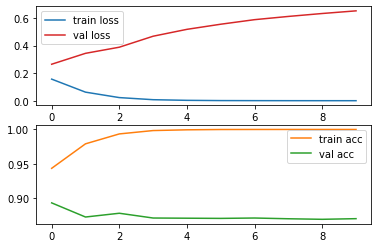

In [ ]:
import matplotlib.pyplot as plt
num_epoch=10
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(num_epoch), history_2.history['loss'], 'tab:blue', label="train loss")
ax1.plot(range(num_epoch), history_2.history['val_loss'], 'tab:red', label="val loss")

ax2.plot(range(num_epoch), history_2.history['accuracy'], 'tab:orange', label="train acc")
ax2.plot(range(num_epoch), history_2.history['val_accuracy'], 'tab:green', label="val acc")

ax1.legend()
ax2.legend()

In [ ]:
# save the model
model.save('m2.h5')


In [ ]:
# evaluate model on test dataset dataset
loss, acc = model.evaluate(testX,array(test_labels.tolist()), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 87.598348


In [ ]:
# evaluate model on test dataset dataset from best check point
model.load_weights(checkpoint_filepath)

loss, acc = model.evaluate(testX,array(test_labels.tolist()), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.545274
